In [1]:
import pandas as pd
import numpy as np
import ast
import os
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML, Image

import cv2

In [10]:
rc('animation', writer='imagemagick')
file_path = os.path.join(os.getcwd(), "test_simplified.csv")

test = pd.read_csv(file_path, nrows=500)
test['drawing'] = test['drawing'].apply(ast.literal_eval)



BASE_SIZE = 256


def draw_cv2(raw_strokes, step, size=256, lw=6):
   
    max_x = max( [max(x)  for x, y in raw_strokes ] )
    max_y = max( [max(y)  for x, y in raw_strokes ] )
   
    max_x, max_y =  max_x + 1, max_y + 1
    img = np.zeros((max_y, max_x), np.uint8)

   
    for i in range(step):
        stroke = raw_strokes[i]
        
        x,y=stroke[0], stroke[1]
        for i in range(len(x) - 1):
            _ = cv2.line(img, (x[i], y[i]),
                         (x[i + 1], y[i + 1]), 255, lw)
   
   
    top = max ( (BASE_SIZE - max_y) // 2 , 0 )
    bottom = max ( BASE_SIZE - top - max_y , 0)
   
    left = max (  (BASE_SIZE - max_x) // 2, 0 )
    right = max ( BASE_SIZE - max_x - left, 0 )
   
   
    img =  cv2.copyMakeBorder(img,top,bottom,left,right,cv2.BORDER_CONSTANT)

    if size != BASE_SIZE:
        return cv2.resize(img, (size, size))
    else:
        return img



class Draw:
    def __init__(self, raw_strokes, fig):
        self.raw_strokes = raw_strokes
        self.count_frame = len(raw_strokes)
        self.fig = fig
    
    def animation(self, size=256, lw=6, interval=250, blit=True):
        ims = []
        for frame in range(self.count_frame):
            image = draw_cv2(self.raw_strokes, frame, size, lw)
            im=plt.imshow(image, animated=True)
            #im.set_cmap('hot')
            #plt.axis('off')
            ims.append([im])
        
        
        return animation.ArtistAnimation(self.fig, ims, interval, blit)
        
        
fig=plt.figure()    
index = 21
draw = Draw (test['drawing'].values[index], fig )
anim = draw.animation(size=256, lw=5)  
#HTML(anim.to_html5_video())    
anim.save("test.gif")

plt.close(fig)



MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


IndexError: index 10 is out of bounds for axis 0 with size 10

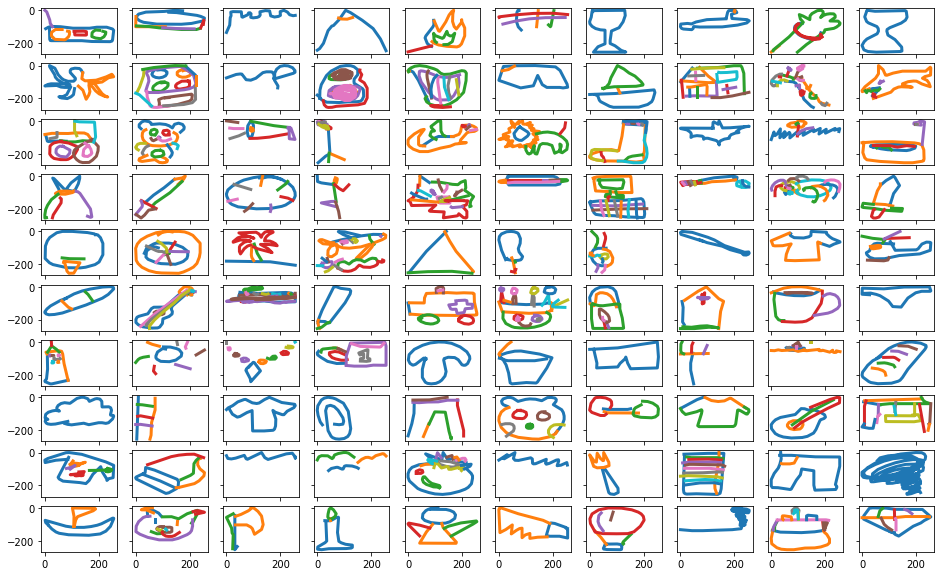

In [16]:
df2 = pd.read_csv(file_path)
df2['drawing'] = df2['drawing'].apply(ast.literal_eval)
n = 10
fig, axs = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(16, 10))
for i, drawing in enumerate(df2['drawing']):
    ax = axs[i // n, i % n]
    for x, y in drawing:
        ax.plot(x, -np.array(y), lw=3)
plt.show();

In [7]:
Image(url='test.gif',width=512, height=512)